In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("train.csv")

In [4]:
# PassengerId: 乘客id号, Survived: 是否是幸存者, 1: 存活, 2: 死亡
# Pclass: 船舱等级, 数字越小等级越高, Name: 乘客姓名
# Sex: 乘客性别, male: 男, female: 女,  Age: 乘客年龄, SibSp: 兄弟姐妹人数
# Parch: 父母和小孩人数, Ticket: 票编号, Fare: 票价格
# Cabin: 船舱号, Embarked: 起始点, 即登船口
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# 统计数值类型分布
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(type(dataset.Age[888]))
np.isnan(dataset.Age[888])

<class 'numpy.float64'>


True

In [9]:
# 查看空值个数
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# 全部控制填充
# dataset.fillna(0)
# 指定字段填充
# dataset.Age.fillna(23)
# 某一字段中位数中位数
age_median = dataset.Age.median()
age_median
# inplace=True 直接在当前dataframe中替换, 默认为False
# dataset.Age.fillna(age_median)
dataset.Age = dataset.Age.fillna(age_median)
# dataset.Age[888]

In [11]:
dataset['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [12]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# 性别统计
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
# 生还者性别统计
survived = dataset[dataset.Survived == 1].Sex.value_counts()
print(survived)
# 未生还者统计
dead = dataset[dataset.Survived == 0]['Sex'].value_counts()
print(dead)

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


In [15]:
df = pd.DataFrame([survived, dead], index=['survived', 'dead'])
df

,female,male
survived,233,109
dead,81,468


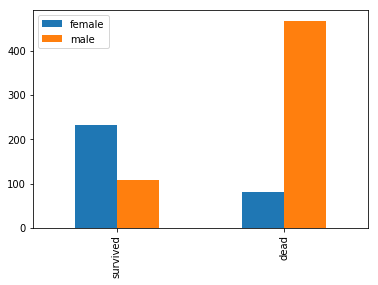

In [16]:
df.plot.bar()

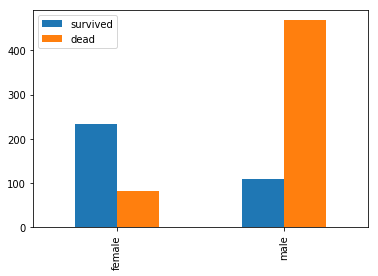

In [17]:
df.T.plot.bar()

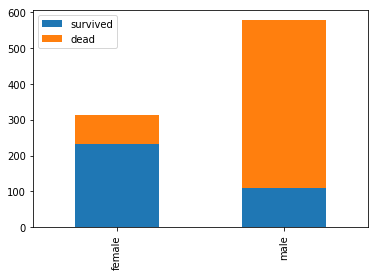

In [18]:
df.T.plot(kind='bar', stacked=True)

In [19]:
df.sum()

female    314
male      577
dtype: int64

In [20]:
df['f'] = df.female / (df.female + df.male)

In [21]:
df['m'] = df.male / (df.female + df.male)

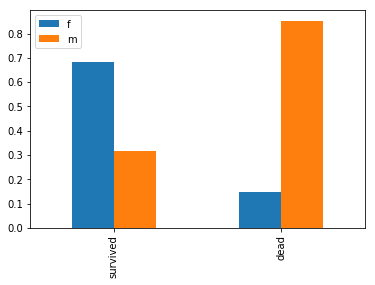

In [22]:
# 性别和是否生还的比例关系
df[['f','m']].plot.bar()

In [23]:
dataset.Age.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
29.00     20
32.00     18
27.00     18
35.00     18
26.00     18
16.00     17
31.00     17
34.00     15
20.00     15
23.00     15
33.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
47.00      9
        ... 
71.00      2
59.00      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
10.00      2
64.00      2
40.50      2
32.50      2
45.50      2
20.50      1
24.50      1
0.67       1
14.50      1
0.92       1
74.00      1
34.50      1
80.00      1
12.00      1
36.50      1
53.00      1
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [24]:
survived1 = dataset[dataset.Survived == 1].Age
dead1 = dataset[dataset.Survived == 0].Age
df1 = pd.DataFrame([survived1, dead1], index=['survived', 'dead'])
df1 = df1.T

In [25]:
df1.head()

,survived,dead
0,NaN,22.0
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
4,NaN,35.0


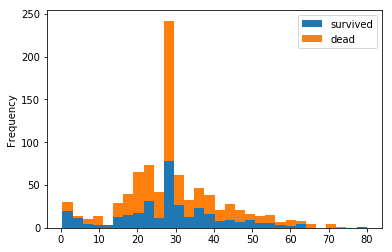

In [26]:
df1.plot.hist(stacked=True, bins=30)

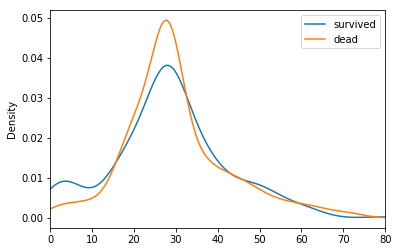

In [27]:
# dataset.Age.describe()
df1.plot.kde(xlim=(0, 80))

In [28]:
# 聚类处理
minor = dataset[dataset.Age <= 18].Survived.value_counts()
middle = dataset[(dataset.Age > 18) & (dataset.Age <= 50)].Survived.value_counts()
elderly = dataset[dataset.Age > 50].Survived.value_counts()
df2 = pd.DataFrame([minor, middle, elderly], index=['minor', 'middle', 'elderly'])
df2.columns = ['dead', 'survived']
df2

,dead,survived
minor,69,70
middle,438,250
elderly,42,22


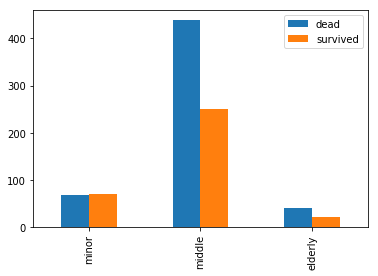

In [29]:
df2.plot.bar()

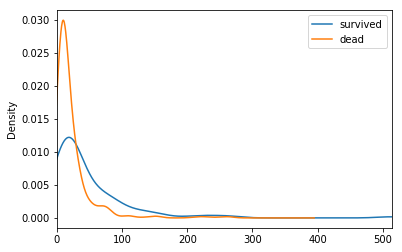

In [34]:
survived2 = dataset[dataset.Survived == 1].Fare
dead2 = dataset[dataset.Survived == 0].Fare
df2 = pd.DataFrame([survived2, dead2], index=['survived', 'dead'])
df2 = df2.T
# df2.plot.kde()
df2.plot(kind='kde', xlim=(0, 513))

In [33]:
dataset.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0, 0.5, 'fare')

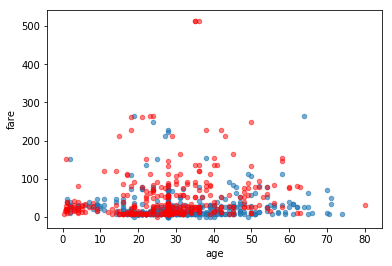

In [71]:
# 组合特征 散点图
ages = dataset[dataset.Survived == 0]['Age']
fares = dataset[dataset.Survived == 0]['Fare']
ages1 = dataset[dataset.Survived == 1]['Age']
fares1 = dataset[dataset.Survived == 1]['Fare']
draw = plt.subplot()
draw.scatter(ages, fares, s=20, alpha=0.6)
draw.scatter(ages1, fares1, s=20, alpha=0.5, c='red')
draw.set_xlabel('age')
draw.set_ylabel('fare')

In [75]:
# 称呼
dataset['call'] = dataset.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
dataset['call'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: call, dtype: object

In [77]:
# 可以通过称呼来推测年龄
dataset.call.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
the Countess      1
Mme               1
Don               1
Jonkheer          1
Capt              1
Ms                1
Sir               1
Name: call, dtype: int64